## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



## Regression
***

Taking a look at the data as plotted on a scatterplot (below), my inclination would be to apply regression as a model. Given that the dataset contains only two variables, simple linear regression may be an option.  

<br>



Firstly, I import the necessary Python packages. `Numpy` to perform numeric calculations, `Pandas` for data manipulation and analysis, `Matplotlib.pyplot` for visualisation and `sklearn.model_selection` to train my model.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow.keras as kr


In [2]:
# Plot style
plt.style.use('ggplot')

# Plot size
plt.rcParams['figure.figsize'] = [14, 8]

<br>

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to the variable `pp` and output the first and final five rows to give a quick overview of the data.

In [3]:
pp = pd.read_csv('powerproduction.csv')
pp

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<br>

The `describe()` function outputs a summary of the data giving us a more nuanced overview.

In [4]:
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


<br>



Visualisation of the data gives us a useful preliminary indication as to what model to choose and train in order to predict values for the dependent variable. Below, I plot the data on a scatterplot. 



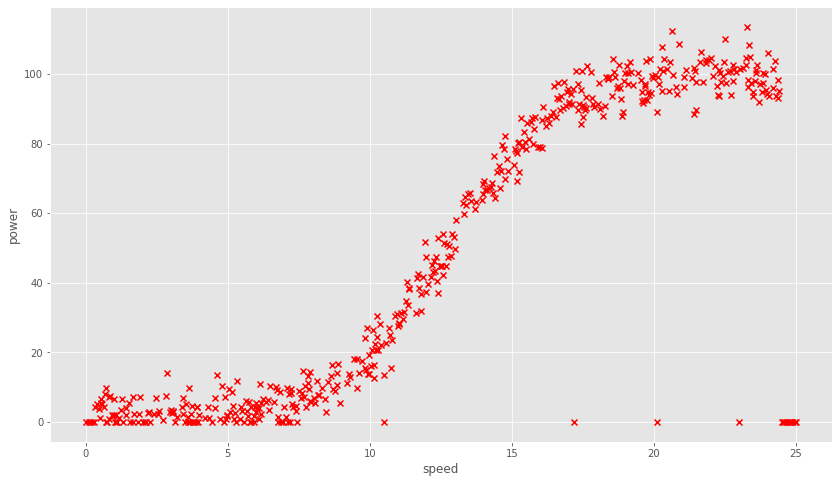

In [5]:
# Plot data on a scatter plot
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp['speed'], pp['power'], color='r', marker='x')

<br>



### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [1]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [2]. With these two considerations in mind, regression appears to be an appropriate approach to take. Firstly, the aim of the current project is to predict wind turbine power output (*dependent variable*) based on speed values (*independent variable*). Second, taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.

[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[2] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>

I use a simple linear regression function imported from Python's Scikit-learn library to produce a model. Simple linear regression can be applied when the data set contains only two variables - a dependent and independent variable. This is a condition which is filled by the 'powerproduction' data set.

<br>

First, the data set is split into two separate columns in order to train the model.

In [6]:
# Create a new dataset containing only values from the speed column and print output
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [7]:
# Create a new dataset containing only values from the power column and print output 
power_df = pp.drop('speed',axis='columns')
power_df

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


<br>

Next, I create an instance of the LinearRegression() class and call the `fit` method, passing the speed and power dataframes as arguments. 

In [8]:
# Create an instance of the LinearRegression() class
reg = LinearRegression()

# Fit our data to the model
reg.fit(speed_df, power_df)

LinearRegression()

Once this is done, we can now test the model for accuracy. We can do this by calling a number of methods provided by the functionality of the `LinearRegresssion()` class.

<br>

First, I take a pick a value for speed and pass it to the `.predict` method

In [9]:
# Predict method using a value for speed
email = 10.89
arr = reg.predict([[9.746]])

<br>

Next, I call the `intercept_` method to determine where the line intercepts the y-axis. And below that I use call `coef_` to get the slope of the line. This gives us all the values for formula for the best-fitting line: $$y = mx + b$$ where m is the slope, b is the y-interept and x is the independent variable [3].

[3] dummies.com; How to calculate a regression line; https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/ <br>

In [10]:
# Call the intercept_ method to determine where the line intercepts the y-axis
reg.intercept_

array([-13.89990263])

In [11]:
# Call the coef_ method to calculate the slope of the line
reg.coef_

array([[4.91759567]])

In [12]:
# Set calculated values
m = 4.91759567
x = 9.746
b = -13.899902630519641

y = m*x + b
print(y)

34.02698476930036


As expected, we get the same result for y when we input these values into the formula (above)
<br>



### R-squared 

The `LinearRegression` class also provides functionality for calculating the the R-squared value. The R-squared value is a 'goodness-of-fit' measure which can give us an indication as to the accuracy of our regression model. The best possible score is 1.0, while a score of 0 or a negative value generally represents a worse-fitting line. The R-squared value "indicates the percentage of the variance in the dependent variable that the independent variables explain collectively." [4] It is worth noting that a high R-squared does not necessarily always indicate the best fit [5].

[4] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[5] *Ibid*

In [13]:
# Calculate R-squared value
reg.score(speed_df, power_df)

0.7289360258564072

<br>


***

### Train_test_split

The train-test-split procedure involves training a machine learning algorithm by splitting the data into separate proportions. One proportion (train) is used to train the model while the other (test) is held back in order to test its accuracy. (It is worth pointing out that it may not always be appropriate as a technique to increase accuracy of prediction e.g. if the data set is too small [6].) 

<br>

Below, I pass the speed_df and power_df dataframes to the `train_test_split` method and set the parameter *test_size* to 0.2. The test size indicates the size of the train and test sets. Common split percentages include 
* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50% [7]


[6] machinelearningmastery.com; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[7] *Ibid*

In [14]:
# Call train_test_split method on dataframes
A_Train, A_Test, B_Train, B_Test = train_test_split(speed_df, power_df, test_size = 0.2)

In [15]:
x = pp['speed']
y = pp['power']

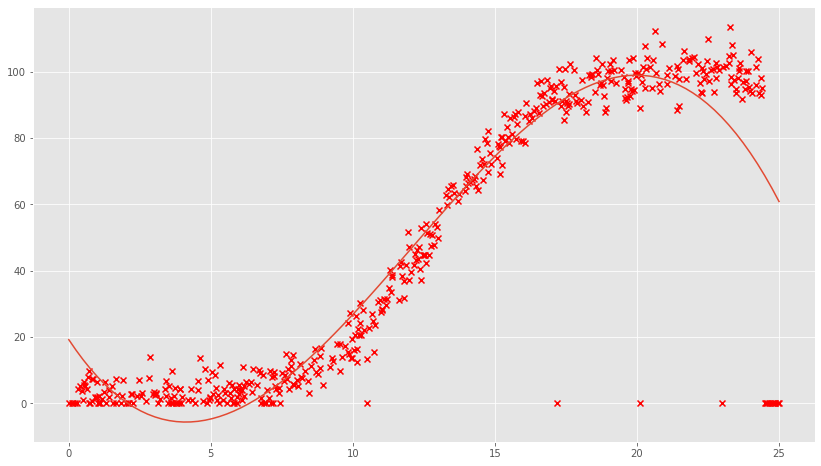

In [16]:
mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()


## Neural network - Regression

***

In [17]:
pp = pp[pp.power != 0]
pp.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [18]:
# Create neural network with one neuron
model = kr.models.Sequential()
model.add(kr.Input(shape=(1,)))
model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')

In [19]:


msk = np.random.rand(len(pp)) < 0.5
train = pp[msk]

test = pp[~msk]

In [20]:
model.fit(train['speed'], train['power'], epochs=1000, batch_size=2)

Epoch 1/1000
118/118 [==============================] - 2s 3ms/step - loss: 2556.8181
Epoch 2/1000
118/118 [==============================] - 0s 3ms/step - loss: 260.1536
Epoch 3/1000
118/118 [==============================] - 0s 3ms/step - loss: 235.6019
Epoch 4/1000
118/118 [==============================] - 0s 3ms/step - loss: 241.0184
Epoch 5/1000
118/118 [==============================] - 0s 3ms/step - loss: 268.4124
Epoch 6/1000
118/118 [==============================] - 0s 3ms/step - loss: 255.8677
Epoch 7/1000
118/118 [==============================] - 0s 3ms/step - loss: 211.7242
Epoch 8/1000
118/118 [==============================] - 0s 3ms/step - loss: 190.1066
Epoch 9/1000
118/118 [==============================] - 0s 3ms/step - loss: 195.8883
Epoch 10/1000
118/118 [==============================] - 0s 3ms/step - loss: 178.2588
Epoch 11/1000
118/118 [==============================] - 0s 3ms/step - loss: 180.8239
Epoch 12/1000
118/118 [==============================] - 0s 3m

118/118 [==============================] - 0s 3ms/step - loss: 32.8321
Epoch 97/1000
118/118 [==============================] - 0s 2ms/step - loss: 24.0032
Epoch 98/1000
118/118 [==============================] - 0s 3ms/step - loss: 30.2921
Epoch 99/1000
118/118 [==============================] - 0s 2ms/step - loss: 28.4608
Epoch 100/1000
118/118 [==============================] - 0s 2ms/step - loss: 41.0821
Epoch 101/1000
118/118 [==============================] - 0s 2ms/step - loss: 34.3892
Epoch 102/1000
118/118 [==============================] - 0s 2ms/step - loss: 31.9479
Epoch 103/1000
118/118 [==============================] - 0s 3ms/step - loss: 31.8131
Epoch 104/1000
118/118 [==============================] - 0s 3ms/step - loss: 29.6674
Epoch 105/1000
118/118 [==============================] - 0s 2ms/step - loss: 35.5154
Epoch 106/1000
118/118 [==============================] - 0s 3ms/step - loss: 26.7215
Epoch 107/1000
118/118 [==============================] - 0s 3ms/step - 

118/118 [==============================] - 0s 3ms/step - loss: 21.8022
Epoch 192/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.7699
Epoch 193/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.3785
Epoch 194/1000
118/118 [==============================] - 0s 3ms/step - loss: 24.5554
Epoch 195/1000
118/118 [==============================] - 0s 3ms/step - loss: 26.7861
Epoch 196/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.4709
Epoch 197/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.8925
Epoch 198/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.2887
Epoch 199/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.8329
Epoch 200/1000
118/118 [==============================] - 0s 3ms/step - loss: 28.7524
Epoch 201/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.7840
Epoch 202/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 22.4376
Epoch 287/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.0000
Epoch 288/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.5558
Epoch 289/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.4551
Epoch 290/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.7476
Epoch 291/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.1447
Epoch 292/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.0872
Epoch 293/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.9055
Epoch 294/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.4973
Epoch 295/1000
118/118 [==============================] - 0s 3ms/step - loss: 16.7408
Epoch 296/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.6196
Epoch 297/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 19.6449
Epoch 382/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.6543
Epoch 383/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.3420
Epoch 384/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.0903
Epoch 385/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.0214
Epoch 386/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.3730
Epoch 387/1000
118/118 [==============================] - 0s 3ms/step - loss: 16.7261
Epoch 388/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.7190
Epoch 389/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.4754
Epoch 390/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.6599
Epoch 391/1000
118/118 [==============================] - 0s 3ms/step - loss: 23.3189
Epoch 392/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 18.2524
Epoch 477/1000
118/118 [==============================] - 0s 3ms/step - loss: 16.1175
Epoch 478/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.3822
Epoch 479/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.4430
Epoch 480/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.2518
Epoch 481/1000
118/118 [==============================] - 0s 3ms/step - loss: 26.2853
Epoch 482/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.3086
Epoch 483/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.8051
Epoch 484/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.1551
Epoch 485/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.4025
Epoch 486/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.9946
Epoch 487/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 20.3823
Epoch 572/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.4771
Epoch 573/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.6362
Epoch 574/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.7968
Epoch 575/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.4160
Epoch 576/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.5513
Epoch 577/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.1604
Epoch 578/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.8905
Epoch 579/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.4574
Epoch 580/1000
118/118 [==============================] - 0s 2ms/step - loss: 17.7294
Epoch 581/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.7243
Epoch 582/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 19.4171
Epoch 667/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.3927
Epoch 668/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.7301
Epoch 669/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.4186
Epoch 670/1000
118/118 [==============================] - 0s 2ms/step - loss: 16.9819
Epoch 671/1000
118/118 [==============================] - 0s 2ms/step - loss: 17.9682
Epoch 672/1000
118/118 [==============================] - 0s 3ms/step - loss: 23.8318
Epoch 673/1000
118/118 [==============================] - 0s 2ms/step - loss: 19.7984
Epoch 674/1000
118/118 [==============================] - 0s 2ms/step - loss: 27.4419
Epoch 675/1000
118/118 [==============================] - 0s 2ms/step - loss: 17.4139
Epoch 676/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.4551
Epoch 677/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 17.9256
Epoch 762/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.7926
Epoch 763/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.1004
Epoch 764/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.7896
Epoch 765/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.7670
Epoch 766/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.9145
Epoch 767/1000
118/118 [==============================] - 0s 3ms/step - loss: 14.3473
Epoch 768/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.0064
Epoch 769/1000
118/118 [==============================] - 0s 3ms/step - loss: 16.2531
Epoch 770/1000
118/118 [==============================] - 0s 3ms/step - loss: 15.4440
Epoch 771/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.8284
Epoch 772/1000
118/118 [==============================] - 0s 2ms/step

118/118 [==============================] - 0s 3ms/step - loss: 22.0636
Epoch 857/1000
118/118 [==============================] - 0s 3ms/step - loss: 20.0945
Epoch 858/1000
118/118 [==============================] - 0s 3ms/step - loss: 27.0320
Epoch 859/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.9542
Epoch 860/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.6605
Epoch 861/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.6983
Epoch 862/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.3889
Epoch 863/1000
118/118 [==============================] - 0s 3ms/step - loss: 21.6711
Epoch 864/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.1668
Epoch 865/1000
118/118 [==============================] - 0s 3ms/step - loss: 22.8450
Epoch 866/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.6512
Epoch 867/1000
118/118 [==============================] - 0s 3ms/step

118/118 [==============================] - 0s 3ms/step - loss: 17.7628
Epoch 952/1000
118/118 [==============================] - 0s 3ms/step - loss: 17.4824
Epoch 953/1000
118/118 [==============================] - 0s 2ms/step - loss: 21.5898
Epoch 954/1000
118/118 [==============================] - 0s 2ms/step - loss: 22.2282
Epoch 955/1000
118/118 [==============================] - 0s 2ms/step - loss: 17.9006
Epoch 956/1000
118/118 [==============================] - 0s 2ms/step - loss: 19.9465
Epoch 957/1000
118/118 [==============================] - 0s 3ms/step - loss: 19.9821
Epoch 958/1000
118/118 [==============================] - 0s 2ms/step - loss: 20.1081: 0s - loss:
Epoch 959/1000
118/118 [==============================] - 0s 2ms/step - loss: 18.9417
Epoch 960/1000
118/118 [==============================] - 0s 2ms/step - loss: 18.9648
Epoch 961/1000
118/118 [==============================] - 0s 3ms/step - loss: 18.3041
Epoch 962/1000
118/118 [==============================] -

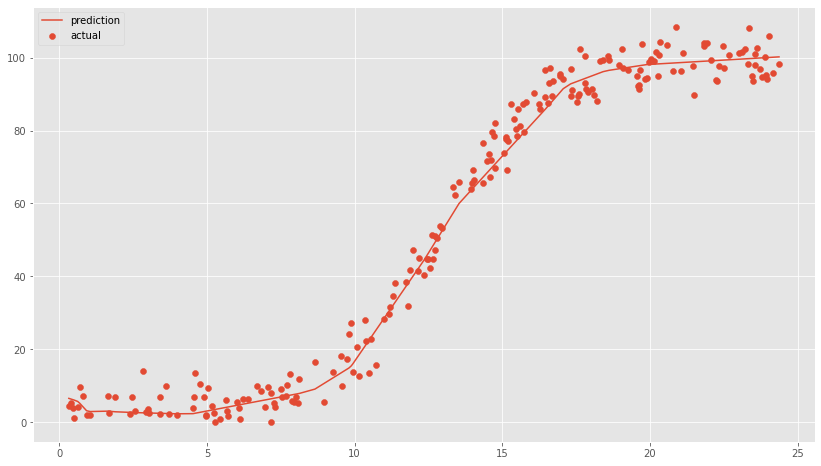

In [22]:
plt.scatter(test['speed'], test['power'], label='actual')
plt.plot(test['speed'], model.predict(test['speed']), label='prediction')
plt.legend()